In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import svm 
from sklearn import metrics
import tensorflow as tf
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('data/iris/Iris.csv')
data = data.drop('Id', axis=1, errors='ignore')

In [3]:
encoder = LabelEncoder()
data['Species'] = encoder.fit_transform(data['Species'])


In [4]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, input_shape=(4,), activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [9]:
history = model.fit(X_train, y_train, epochs=100, batch_size=10,validation_data=(X_test, y_test),verbose=0)


In [29]:

datapoints = []
for epoch in range(100):
    datapoint = {
        'epoch': epoch + 1,
        'loss': history.history['loss'][epoch],
        'accuracy': history.history['accuracy'][epoch],
        'val_loss': history.history['val_loss'][epoch],
        'val_accuracy': history.history['val_accuracy'][epoch]
    }
    datapoints.append(datapoint)
print(datapoints)

[{'epoch': 1, 'loss': 1.1115837097167969, 'accuracy': 0.2666666805744171, 'val_loss': 1.098488211631775, 'val_accuracy': 0.5}, {'epoch': 2, 'loss': 1.089473009109497, 'accuracy': 0.42500001192092896, 'val_loss': 1.074815034866333, 'val_accuracy': 0.5}, {'epoch': 3, 'loss': 1.0730520486831665, 'accuracy': 0.40833333134651184, 'val_loss': 1.057942271232605, 'val_accuracy': 0.5333333611488342}, {'epoch': 4, 'loss': 1.0593459606170654, 'accuracy': 0.4166666567325592, 'val_loss': 1.0372605323791504, 'val_accuracy': 0.46666666865348816}, {'epoch': 5, 'loss': 1.0416170358657837, 'accuracy': 0.3916666805744171, 'val_loss': 1.0114970207214355, 'val_accuracy': 0.46666666865348816}, {'epoch': 6, 'loss': 1.0210702419281006, 'accuracy': 0.375, 'val_loss': 0.9806421995162964, 'val_accuracy': 0.4333333373069763}, {'epoch': 7, 'loss': 0.994234025478363, 'accuracy': 0.6000000238418579, 'val_loss': 0.945749044418335, 'val_accuracy': 0.7333333492279053}, {'epoch': 8, 'loss': 0.9648689031600952, 'accuracy

In [28]:
test_loss, test_acc = model.evaluate(X_test, y_test)


1/1 [==============================] - 0s 36ms/step - loss: 0.0451 - accuracy: 0.9667


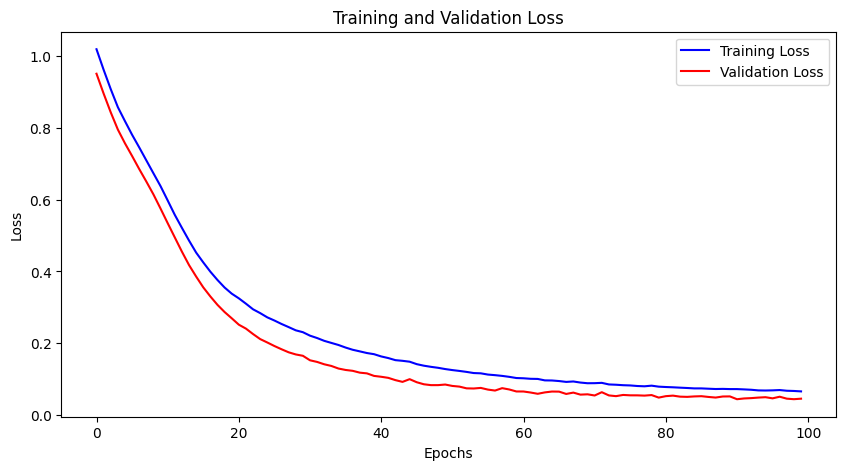

In [29]:
import matplotlib.pyplot as plt

# loss plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='b')
plt.plot(history.history['val_loss'], label='Validation Loss', color='r')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

